In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical

from keras import backend as K

K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print("train shape ", train.shape, " test shape ", test.shape)
print(train.columns.groupby(train.dtypes))

train shape  (42000, 785)  test shape  (28000, 784)
{dtype('int64'): Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)}


In [4]:
y_train = train['label']
train.drop('label', axis=1, inplace=True)
train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
null_data = (train.isnull().sum() / len(train)) * 100
null_data = null_data.drop(null_data[null_data == 0].index)
null_data

Series([], dtype: float64)

In [6]:
null_data = (test.isnull().sum() / len(test)) * 100
null_data = null_data.drop(null_data[null_data == 0].index)
null_data

Series([], dtype: float64)

In [7]:
train /= 255.0
test /= 255.0
train = train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
print("new train ", train.shape, " new test ", test.shape)

new train  (42000, 28, 28, 1)  new test  (28000, 28, 28, 1)


In [8]:
def myModel():
    
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10 ,activation='softmax'))
    
    return model

In [ ]:
y_one_hot = to_categorical(y_train)

n_train = int(0.9 * len(train))
x_train = train[:n_train]
x_test = train[n_train:]

y_train_one_hot = y_one_hot[:n_train]
y_test_one_hot = y_one_hot[n_train:]

epoch = 4

cnn_model = myModel()
cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
fittingData = cnn_model.fit(x_train, y_train_one_hot, epochs=epoch, validation_data=(x_test, y_test_one_hot))

score = cnn_model.evaluate(x_test, y_test_one_hot)

Train on 37800 samples, validate on 4200 samples
Epoch 1/4
37800/37800 [==============================] - 88s 2ms/step - loss: 0.3962 - acc: 0.8747 - val_loss: 0.0799 - val_acc: 0.9762
Epoch 2/4
37800/37800 [==============================] - 86s 2ms/step - loss: 0.1180 - acc: 0.9673 - val_loss: 0.0488 - val_acc: 0.9855
Epoch 3/4
37800/37800 [==============================] - 86s 2ms/step - loss: 0.0856 - acc: 0.9761 - val_loss: 0.0475 - val_acc: 0.9871
Epoch 4/4
26880/37800 [====================>.........] - ETA: 24s - loss: 0.0768 - acc: 0.9784

In [ ]:
print(score)

In [ ]:
result = cnn_model.predict(test)
result = np.argmax(result, axis = 1)
result = pd.Series(result, name="Label")

submission = pd.concat([pd.Series(range(1, 28001), name = "ImageId"), result], axis = 1)
submission.to_csv("cnn_submission.csv",index=False)

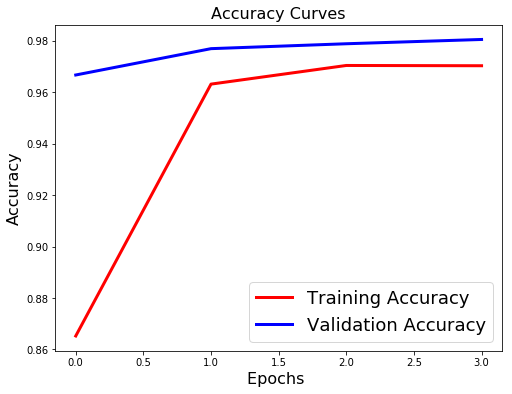

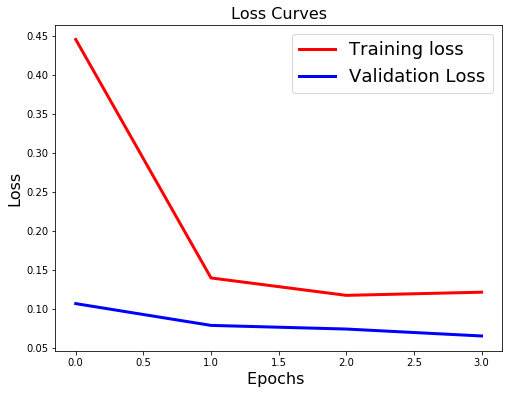

In [12]:
def loss_curve(history):
    
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

def accuracy_curve(history):
    
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'r',linewidth=3.0)
    plt.plot(history.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    
accuracy_curve(fittingData)
loss_curve(fittingData)